In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf

In [2]:
# Define the time period and stock symbol
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol = 'ZOMATO.NS'

# Download stock data
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data 

Price,Open,High,Low,Close
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997


In [5]:
 # Adjust to your column names
new_headers = ['Open','High','Low','Close'] 
stk_data.columns = new_headers

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997
2021-12-31,133.850006,138.399994,133.399994,137.399994


In [7]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 2021-07-23 to 2022-01-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    113 non-null    float64
 1   High    113 non-null    float64
 2   Low     113 non-null    float64
 3   Close   113 non-null    float64
dtypes: float64(4)
memory usage: 4.4 KB


In [8]:
column="Close"

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (113, 1)


In [10]:
len(data1)

113

In [11]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

107
X_train length: (107, 1)
X_test length: (6, 1)
y_train length: (107, 1)
y_test length: (6, 1)


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.27066841055885177
maPe-Testset: 0.5536518732266208
************


C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.12798686456858752
maPe-Testset: 0.3487569896097928
************


C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.09296503438921602
maPe-Testset: 0.19855957437684071
************
Trend=ct
RMSE-Testset: 0.11354841163580835
maPe-Testset: 0.3191398344188631
************


In [14]:
len(y_pred)

6

In [15]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Dell\anaconda3\envs\tsa\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.1642507593503384
maPe-Testset: 0.3783522303379367
************


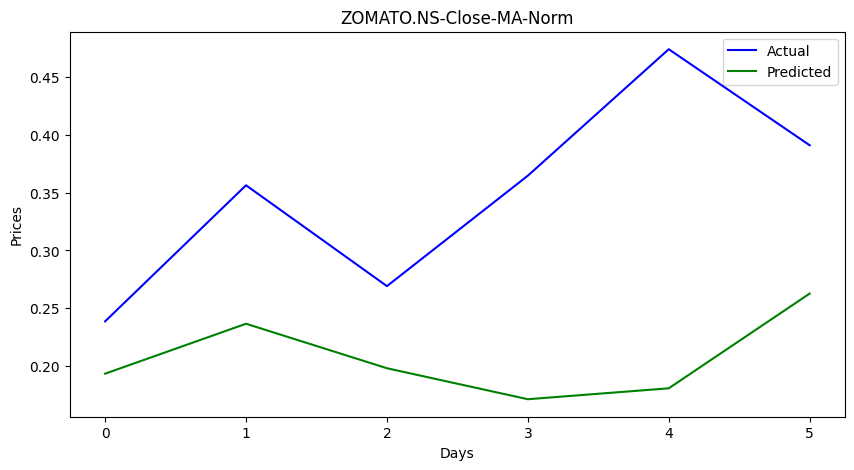

In [16]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","ZOMATO.NS-Close-MA-Norm","Days","Prices")

In [17]:
len(data1)

113

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [19]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

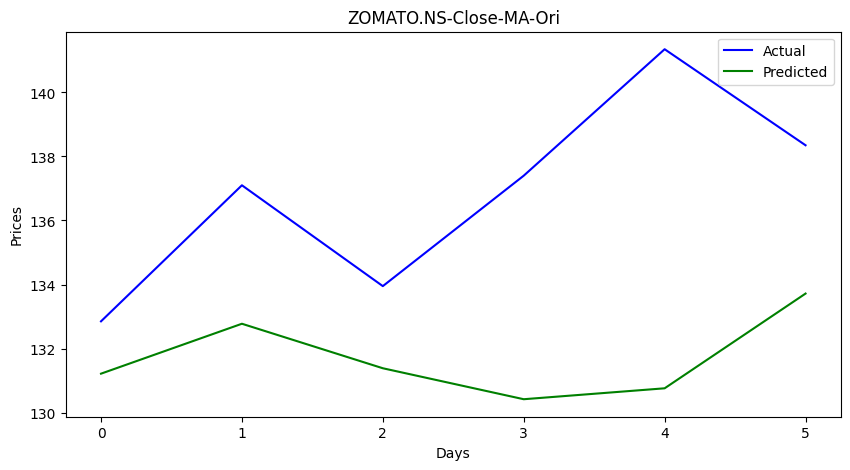

In [20]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","ZOMATO.NS-Close-MA-Ori","Days","Prices")

In [21]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 5.921240375833238
maPe-Testset: 0.03704050097503925


In [22]:
forecast=model_fit.predict(len(data1), len(data1))

In [23]:
forecast

array([0.22328758])

In [24]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [25]:
forecast_stock_price_test_oriF

,Closefore
0,132.299518
